In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
DFexp0 = pd.read_excel('Akigora_code/data/Akigora_data.xlsx', sheet_name = 'Collection Experts')
DFexp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   _id                                   2455 non-null   object        
 1   type                                  2455 non-null   object        
 2   userId                                2455 non-null   object        
 3   createdAt                             2455 non-null   object        
 4   Created                               2454 non-null   datetime64[ns]
 5   Update                                2455 non-null   datetime64[ns]
 6   updatedAt                             2455 non-null   int64         
 7   domains                               2133 non-null   object        
 8   sectors                               1996 non-null   object        
 9   studyLevel                            978 non-null    object        
 10  

In [13]:
seuil_non_nullite = int(0.85 * len(DFexp0))
DFexp2 = DFexp0
DFexp2 = DFexp2.dropna(axis=1, thresh=seuil_non_nullite)
DFexp2.shape , DFexp0.shape

((2455, 12), (2455, 30))

In [14]:
start_date = DFexp2['Created'].min()
end_date = DFexp2['Created'].max()
start_date, end_date

(Timestamp('2018-07-30 00:00:00'), Timestamp('2023-11-01 00:00:00'))

In [15]:
DFexp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          2455 non-null   object        
 1   type         2455 non-null   object        
 2   userId       2455 non-null   object        
 3   createdAt    2455 non-null   object        
 4   Created      2454 non-null   datetime64[ns]
 5   Update       2455 non-null   datetime64[ns]
 6   updatedAt    2455 non-null   int64         
 7   domains      2133 non-null   object        
 8   experiences  2191 non-null   object        
 9   visible      2143 non-null   float64       
 10  percentage   2228 non-null   float64       
 11  geo          2144 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 230.3+ KB


In [16]:
#Le nombre d'inscrit sur la plateforme est tout simplement le nombre de lignes que compose le dataframe soit.
Nb_experts = DFexp0.shape[0]
Nb_experts

2455

In [17]:
DFexp0['visible'].astype(bool)

0       False
1       False
2        True
3        True
4        True
        ...  
2450     True
2451     True
2452     True
2453     True
2454     True
Name: visible, Length: 2455, dtype: bool

In [18]:
nb_visible = sum(DFexp0['visible']==1.0)
nb_visible

1789

In [19]:
nb_tempo_invisible = sum(DFexp0['temporarilyInvisible']==1.0)
nb_tempo_invisible, (nb_visible - nb_tempo_invisible)

(101, 1688)

In [20]:
profil_remplis = sum(DFexp0['percentage']==100) / 2455
prct_profil_remplis = round(profil_remplis * 100, 2)
prct_profil_remplis

62.36

In [21]:
profil_incomplet = sum(DFexp0['percentage'] !=100)
profil_incomplet

924

In [22]:
Domains = DFexp0['domains'].unique()
Domains

array(['Enseignement / Recherche / Formation', nan,
       'Informatique / Télécoms', 'Commerce / Négoce / Distribution',
       'Études et conseils', 'Industrie',
       'Métallurgie / Travail du métal', 'Management',
       'Édition / Communication / Information',
       'Hôtellerie / Restauration / Tourisme', 'Services aux entreprises',
       'Transports / Logistique', 'Agroalimentaire / Agriculture',
       'Électronique / Électricité', 'Énergies / Environnement',
       'Architecture / Paysage / Urbanisme', 'Banque / Assurance',
       'Arts / Artisanat / Culture', 'Textile / Habillement / Chaussure',
       'Armée / Sécurité', 'Santé / Social / Sport et loisirs',
       'Chimie / Parachimie / Pharmacie', 'Conseils/services',
       'BTP - Immobilier', 'BTP / Construction', 'Plastique / Caoutchouc',
       'Traduction / Interprétariat', 'Bois / Papier / Carton',
       'Machines et équipements / Automobile',
       'Commerce, Négoce, Distribution'], dtype=object)

In [23]:
Domains_grouped = DFexp0.groupby('domains').size()
Domains_grouped_sorted = Domains_grouped.sort_values(ascending=False)
Domains_grouped_sorted
#Voila la liste des domaines couvert par les experts et le nombre d'expert dans chacuns des domaines

domains
Enseignement / Recherche / Formation     346
Informatique / Télécoms                  299
Commerce / Négoce / Distribution         266
Services aux entreprises                 255
Études et conseils                       165
Édition / Communication / Information    155
Industrie                                112
Santé / Social / Sport et loisirs         63
Banque / Assurance                        62
Agroalimentaire / Agriculture             58
Hôtellerie / Restauration / Tourisme      57
Énergies / Environnement                  48
Management                                40
Transports / Logistique                   33
BTP / Construction                        33
Arts / Artisanat / Culture                28
Chimie / Parachimie / Pharmacie           24
Textile / Habillement / Chaussure         18
Machines et équipements / Automobile      14
Architecture / Paysage / Urbanisme        13
Conseils/services                          8
Électronique / Électricité                 8
Ar

In [24]:
Domains_prct = round((DFexp0['domains'].dropna().value_counts(normalize=True)*100), 2)
Domains_prct

domains
Enseignement / Recherche / Formation     16.22
Informatique / Télécoms                  14.02
Commerce / Négoce / Distribution         12.47
Services aux entreprises                 11.95
Études et conseils                        7.74
Édition / Communication / Information     7.27
Industrie                                 5.25
Santé / Social / Sport et loisirs         2.95
Banque / Assurance                        2.91
Agroalimentaire / Agriculture             2.72
Hôtellerie / Restauration / Tourisme      2.67
Énergies / Environnement                  2.25
Management                                1.88
Transports / Logistique                   1.55
BTP / Construction                        1.55
Arts / Artisanat / Culture                1.31
Chimie / Parachimie / Pharmacie           1.13
Textile / Habillement / Chaussure         0.84
Machines et équipements / Automobile      0.66
Architecture / Paysage / Urbanisme        0.61
Conseils/services                         0.38
Élect

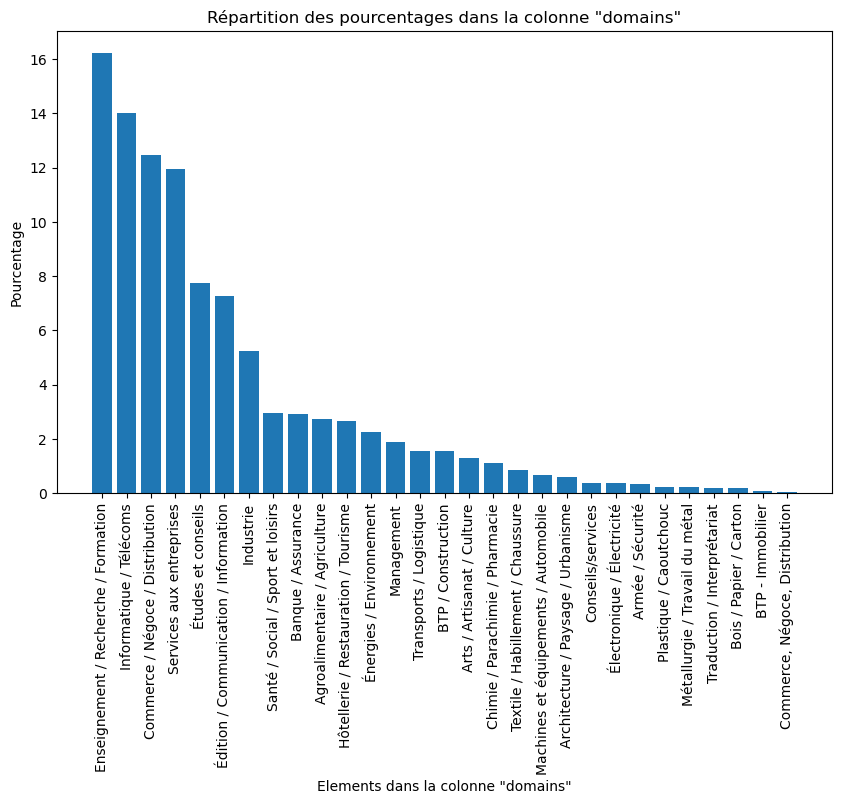

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(Domains_prct.index, Domains_prct)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains"')
plt.xticks(rotation=90)

plt.show()

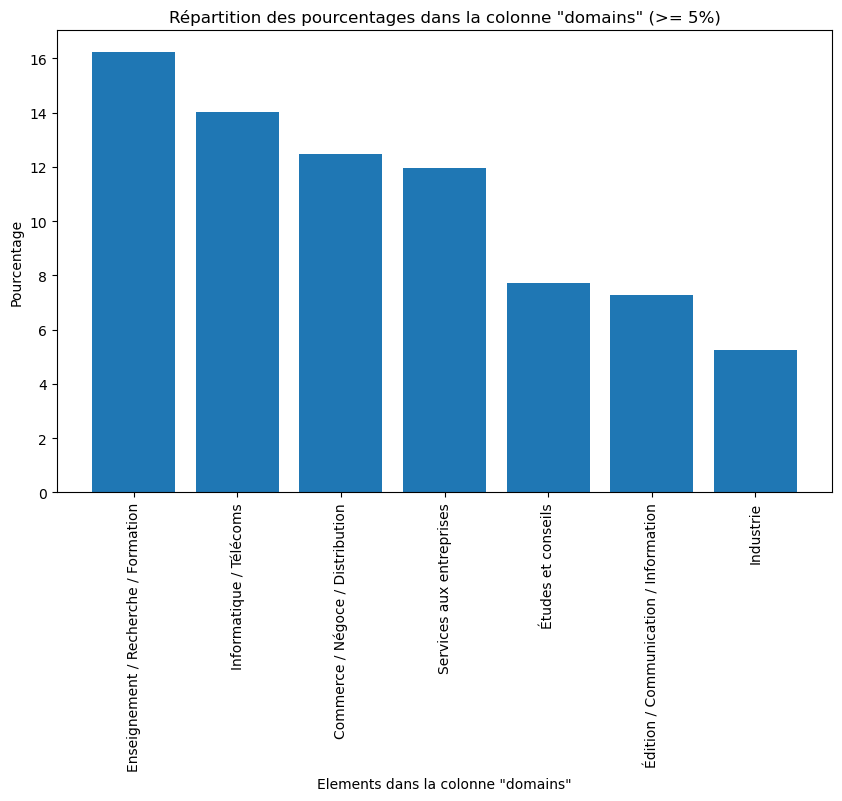

In [26]:
Domains_prct_filtre = Domains_prct[Domains_prct >= 5]

plt.figure(figsize=(10, 6))
plt.bar(Domains_prct_filtre.index, Domains_prct_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()

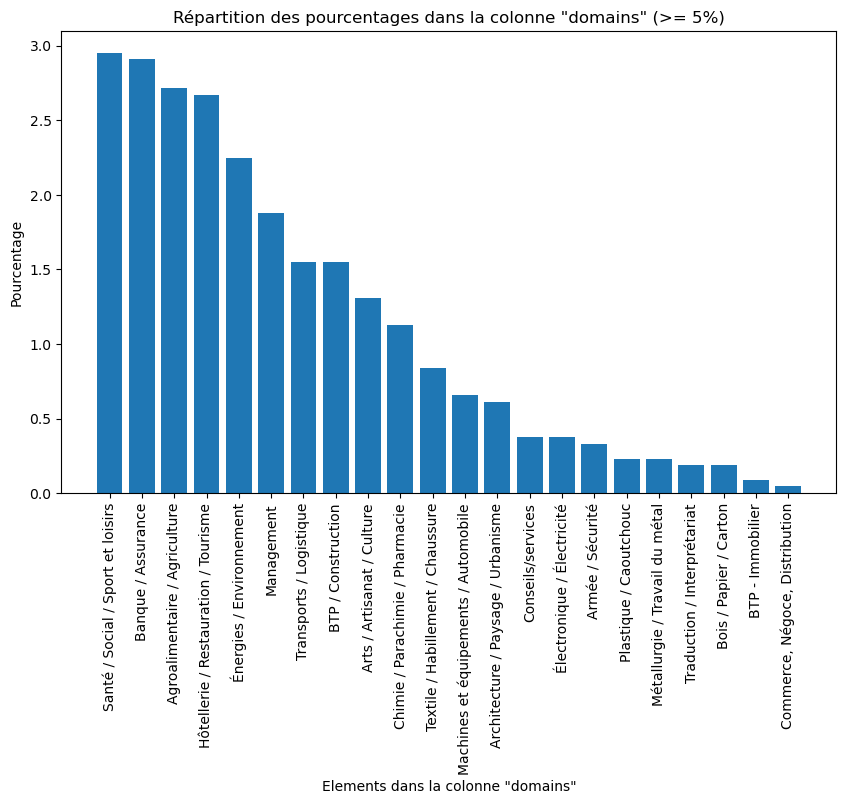

In [27]:
Domains_prct_filtre = Domains_prct[Domains_prct < 5]

plt.figure(figsize=(10, 6))
plt.bar(Domains_prct_filtre.index, Domains_prct_filtre)
plt.xlabel('Elements dans la colonne "domains"')
plt.ylabel('Pourcentage')
plt.title('Répartition des pourcentages dans la colonne "domains" (>= 5%)')
plt.xticks(rotation=90)

plt.show()

In [28]:
Localisation = DFexp0['location'].unique()

In [29]:
DFexp1 = DFexp0
DFexp1['location'] = DFexp1['location'].str.split().str.get(0)
DFexp1['location'] = DFexp1['location'].str.replace(',','')
DFexp1['location']

0                 NaN
1            Bordeaux
2            Toulouse
3       Saint-Étienne
4                 NaN
            ...      
2450         Bordeaux
2451         Libourne
2452         Bordeaux
2453         Bordeaux
2454         Bordeaux
Name: location, Length: 2455, dtype: object

In [30]:
Ville_grouped = DFexp1.groupby('location').size()
Ville_grouped_sorted = Ville_grouped.sort_values(ascending=False)
Top_10_villes = Ville_grouped_sorted.head(10)
Top_10_villes

location
Bordeaux         976
Paris            243
Lyon             133
Toulouse          70
Nantes            59
Lille             50
Montpellier       26
Bayonne           19
Île-de-France     19
France            18
dtype: int64

In [31]:
Pourcentage_ville = round((DFexp1['location'].dropna().value_counts(normalize=True)*100), 2)

In [32]:
pourcent_Top_10_villes = Pourcentage_ville.head(10)


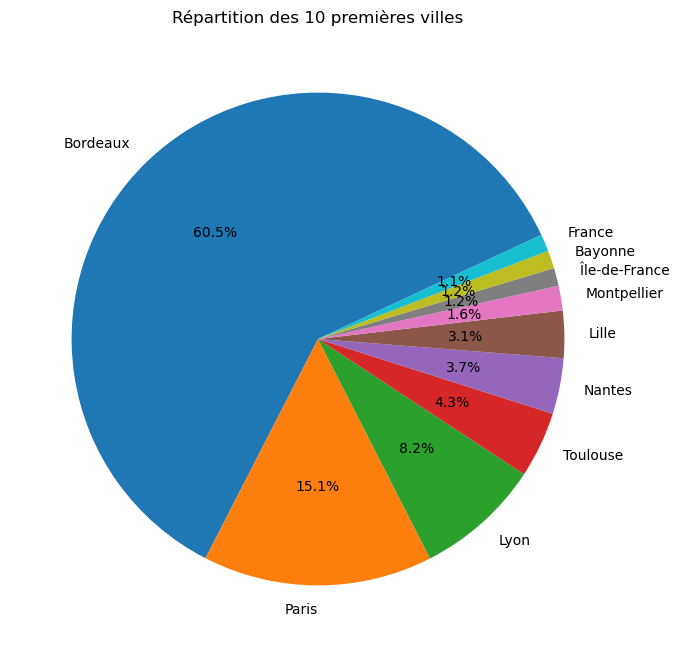

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(pourcent_Top_10_villes, labels=pourcent_Top_10_villes.index, autopct='%1.1f%%', startangle=25)
plt.title('Répartition des 10 premières villes')
plt.show()

In [34]:
DFexp2

,_id,type,userId,createdAt,Created,Update,updatedAt,domains,experiences,visible,percentage,geo
0,656a3826843c536c576b8f56,expert,656a3826843c536c576b8f55,01/11/2023,2023-11-01,2023-12-01 19:49:42.590,1701460182590,Enseignement / Recherche / Formation,"[{""date"":"""",""dateEnd"":"""",""company"":"""",""job"":""""...",0.0,25.0,NaN
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,2023-11-01,2023-12-01 16:41:00.078,1701448860078,NaN,"[{""company"":""Akigora.com"",""job"":""Développeur w...",0.0,0.0,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,2023-11-01,2023-12-01 10:34:32.307,1701426872307,Informatique / Télécoms,"[{""date"":612396000000,""dateEnd"":1688421600000,...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
3,6569016711ad9c29f9317f82,expert,6569016711ad9c29f9317f81,30/10/2023,2023-10-30,2023-12-01 13:59:47.742,1701439187742,Commerce / Négoce / Distribution,"[{""date"":1172703600000,""dateEnd"":1565820000000...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
4,6568c29411ad9c29f9317ea1,expert,6568c29411ad9c29f9317ea0,30/10/2023,2023-10-30,2023-11-30 17:12:52.080,1701364372080,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,2018-09-20,2021-10-27 14:23:54.005,1635344634005,Services aux entreprises,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",1.0,55.0,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,2018-09-20,2021-10-27 14:23:54.004,1635344634004,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",1.0,55.0,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,2018-09-19,2022-08-15 08:50:42.806,1660553442806,Industrie,"[{""date"":1483225200000,""dateEnd"":1546297200000...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,2018-09-13,2022-05-12 07:48:00.180,1652341680180,Commerce / Négoce / Distribution,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."


In [35]:
DFexp3 = DFexp2
DFexp3 = DFexp3.dropna(subset=['Created'])
DFexp3 = DFexp3.sort_values(by='Created', ascending=True)
DFexp3

,_id,type,userId,createdAt,Created,Update,updatedAt,domains,experiences,visible,percentage,geo
2454,5b5eec1198735b66d48fe3d3,expert,5b5eec1198735b66d48fe3d2,30/07/2018,2018-07-30,2021-10-27 14:23:53.998,1635344633998,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Emera...",1.0,55.0,"{""localized"":true,""localizationSuccess"":true,""..."
2453,5b9a70668b91483739a2efed,expert,5b9a70668b91483739a2efec,13/09/2018,2018-09-13,2022-05-12 07:48:00.180,1652341680180,Commerce / Négoce / Distribution,"[{""date"":1064786400000,""dateEnd"":"""",""city"":""PE...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
2452,5ba2279548b26d4df25496f8,expert,5ba2276a48b26d4df25496f7,19/09/2018,2018-09-19,2022-08-15 08:50:42.806,1660553442806,Industrie,"[{""date"":1483225200000,""dateEnd"":1546297200000...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
2451,5ba3a49348b26d4df2549700,expert,5ba3a49348b26d4df25496ff,20/09/2018,2018-09-20,2021-10-27 14:23:54.004,1635344634004,Commerce / Négoce / Distribution,"[{""date"":"""",""city"":"""",""company"":""Prêt à porter...",1.0,55.0,"{""localized"":true,""localizationSuccess"":true,""..."
2450,5ba3acee48b26d4df2549702,expert,5ba3acee48b26d4df2549701,20/09/2018,2018-09-20,2021-10-27 14:23:54.005,1635344634005,Services aux entreprises,"[{""date"":"""",""city"":""Bordeaux"",""company"":""Karop...",1.0,55.0,"{""localized"":true,""localizationSuccess"":true,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...
67,65411787807b0265e77ec37d,expert,65411787807b0265e77ec37c,45230,2023-10-31,2023-10-31 15:04:39.566,1698764679566,NaN,NaN,NaN,NaN,NaN
65,6541378e8bc3c608241a0059,expert,6541378e8bc3c608241a0058,45230,2023-10-31,2023-11-09 08:30:40.716,1699518640716,Informatique / Télécoms,"[{""date"":1612134000000,""dateEnd"":"""",""company"":...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
2,656997ac11ad9c29f93180b2,expert,656997ac11ad9c29f93180b1,01/11/2023,2023-11-01,2023-12-01 10:34:32.307,1701426872307,Informatique / Télécoms,"[{""date"":612396000000,""dateEnd"":1688421600000,...",1.0,100.0,"{""localized"":true,""localizationSuccess"":true,""..."
1,656a0b86843c536c576b8ef5,expert,656a0b86843c536c576b8ef4,01/11/2023,2023-11-01,2023-12-01 16:41:00.078,1701448860078,NaN,"[{""company"":""Akigora.com"",""job"":""Développeur w...",0.0,0.0,"{""localized"":true,""localizationSuccess"":true,""..."


In [36]:
#courbe le nombre d'expert inscrit en fonction du temps
#courbe numbre d'expert inscrit par semestre.
#date created et sommer les ID, regrouper les ID de la meme date
#regrouper les ID sur 6 mois 
#DFexp3
#crée un df 1 ind 2created (unique) 3 nb_expert 

In [37]:
Expert_grouped = DFexp3.groupby('Created').size()
Expert_grouped

Created
2018-07-30     1
2018-09-13     1
2018-09-19     1
2018-09-20     2
2018-09-24     1
              ..
2023-10-28     1
2023-10-29     4
2023-10-30    10
2023-10-31     3
2023-11-01     3
Length: 1060, dtype: int64

In [38]:
DFgrouped = pd.DataFrame(Expert_grouped)
DFgrouped

,0
Created,
2018-07-30,1
2018-09-13,1
2018-09-19,1
2018-09-20,2
2018-09-24,1
...,...
2023-10-28,1
2023-10-29,4
2023-10-30,10


In [39]:
counts_by_interval = DFgrouped.groupby(pd.Grouper(freq='6M')).size()

In [40]:
cumulative_counts_by_interval = counts_by_interval.cumsum()

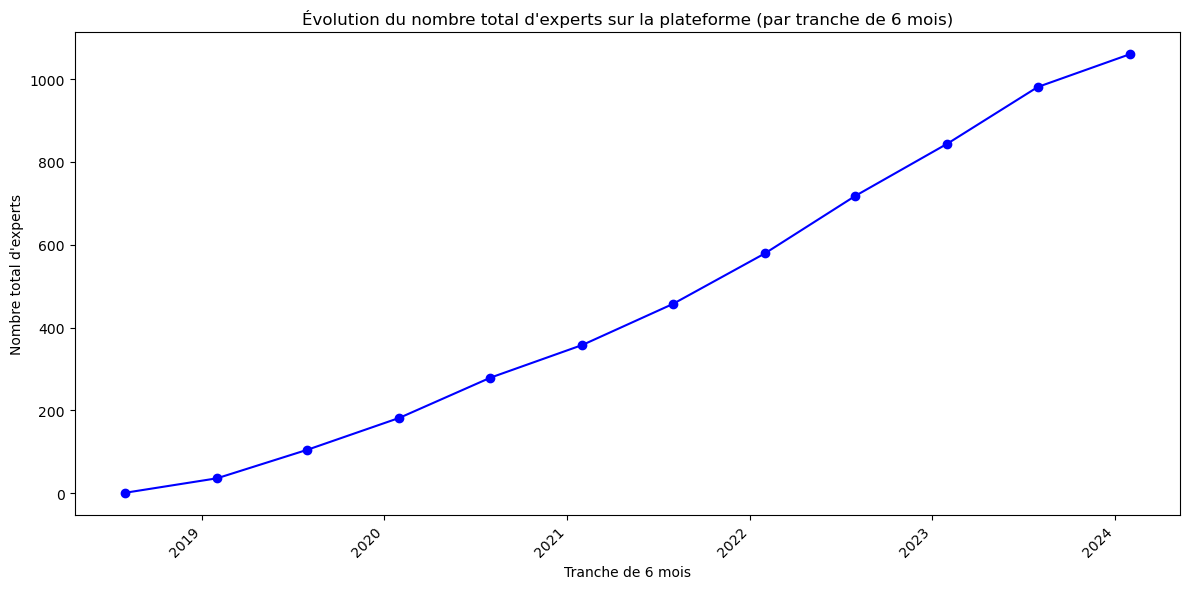

In [41]:
# Tracer la courbe
plt.figure(figsize=(12, 6))
plt.plot(cumulative_counts_by_interval.index, cumulative_counts_by_interval.values, linestyle='-', color='b', marker='o')
plt.title('Évolution du nombre total d\'experts sur la plateforme (par tranche de 6 mois)')
plt.xlabel('Tranche de 6 mois')
plt.ylabel('Nombre total d\'experts')
plt.xticks(rotation=45, ha='right')  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()
plt.show()


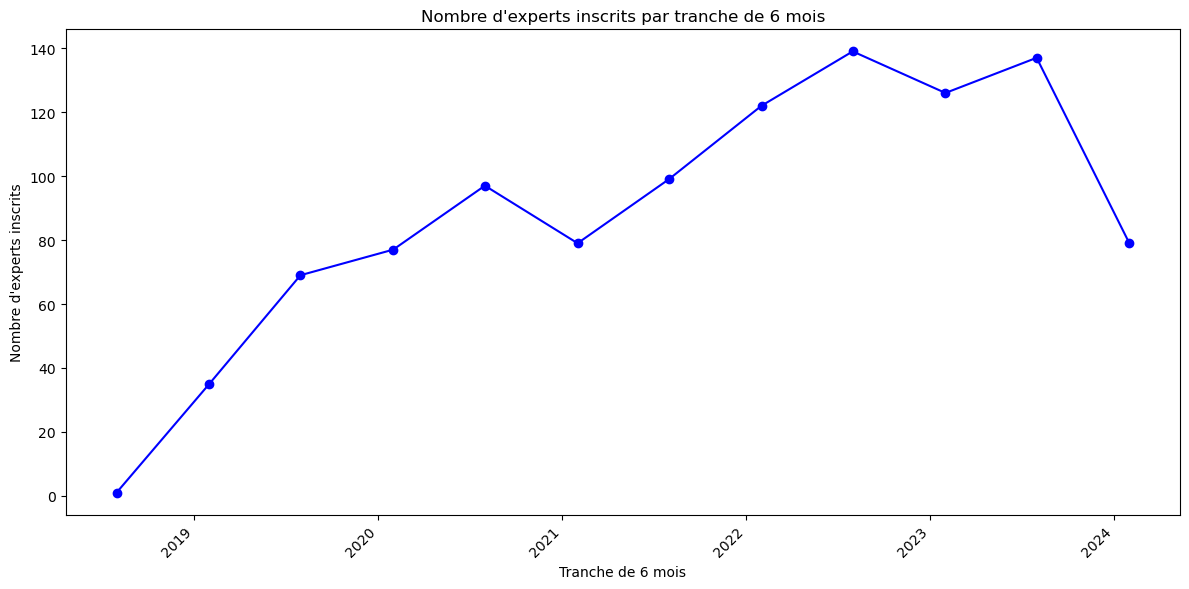

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(counts_by_interval.index, counts_by_interval.values, linestyle='-', color='b', marker='o')
plt.title('Nombre d\'experts inscrits par tranche de 6 mois')
plt.xlabel('Tranche de 6 mois')
plt.ylabel('Nombre d\'experts inscrits')
plt.xticks(rotation=45, ha='right')  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()
plt.show()


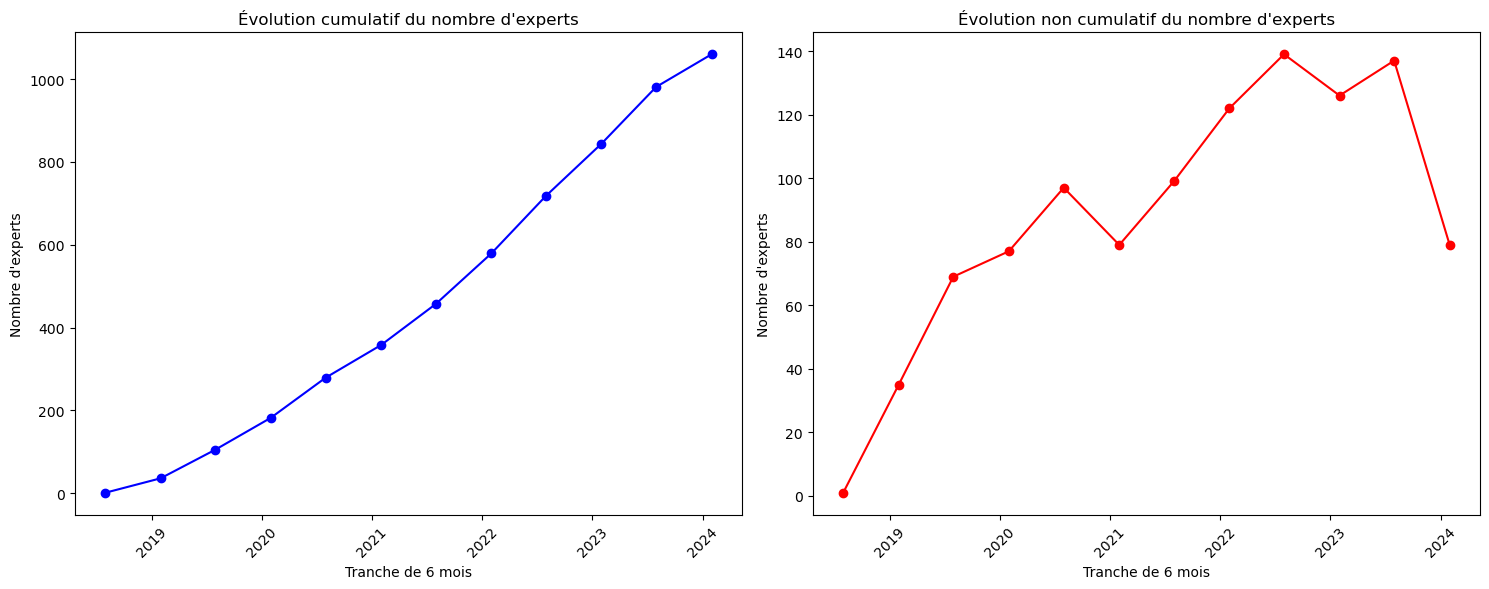

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tracer le premier graphique (cumulatif)
axs[0].plot(cumulative_counts_by_interval.index, cumulative_counts_by_interval.values, linestyle='-', color='b', marker='o')
axs[0].set_title('Évolution cumulatif du nombre d\'experts')
axs[0].set_xlabel('Tranche de 6 mois')
axs[0].set_ylabel('Nombre d\'experts')
axs[0].tick_params(axis='x', rotation=45)  # Rotation des dates pour une meilleure lisibilité

# Tracer le deuxième graphique (non cumulatif)
axs[1].plot(counts_by_interval.index, counts_by_interval.values, linestyle='-', color='r', marker='o')
axs[1].set_title('Évolution non cumulatif du nombre d\'experts')
axs[1].set_xlabel('Tranche de 6 mois')
axs[1].set_ylabel('Nombre d\'experts')
axs[1].tick_params(axis='x', rotation=45)  # Rotation des dates pour une meilleure lisibilité

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [44]:
DFexp3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 2454 to 0
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          2454 non-null   object        
 1   type         2454 non-null   object        
 2   userId       2454 non-null   object        
 3   createdAt    2454 non-null   object        
 4   Created      2454 non-null   datetime64[ns]
 5   Update       2454 non-null   datetime64[ns]
 6   updatedAt    2454 non-null   int64         
 7   domains      2132 non-null   object        
 8   experiences  2190 non-null   object        
 9   visible      2142 non-null   float64       
 10  percentage   2227 non-null   float64       
 11  geo          2143 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 249.2+ KB
